In [2]:
%load_ext autoreload

%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from afinn import Afinn
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from character_network_iterative import *

novel_folder = '/Users/ohad.e/Projects/study/nlp_final/nlp_harry_potter/books'

print(1)
nlp_func = spacy.load('en_core_web_sm')
print(2)
novel_name = "Tom Clancy"
# novel_folder = Path(os.getcwd()) / 'novels'
novel = read_text("/Users/ohad.e/Projects/study/nlp_final/nlp_harry_potter/books", "Clancy Tom - Patriot Games.txt")
print(3)
sentence_list = sent_tokenize(novel)
print(len(sentence_list))
print(4)
align_rate = calculate_align_rate(sentence_list)
print(5)

1
2
3
17669
4
5


In [ ]:
preliminary_name_list = iterative_NER(nlp_func, sentence_list)
print(6)
name_frequency, name_list = top_names(preliminary_name_list, novel, 25)
print(7)
cooccurrence_matrix, sentiment_matrix = calculate_matrix(name_list, sentence_list, align_rate)
print(8)
# plot co-occurrence and sentiment graph for Harry Potter


In [ ]:
plot_graph(name_list, name_frequency, cooccurrence_matrix, novel_name + ' co-occurrence graph', 'co-occurrence')
plot_graph(name_list, name_frequency, sentiment_matrix, novel_name + ' sentiment graph', 'sentiment')

In [ ]:
novel_list = ["Harry Potter 1 - Sorcerer's Stone.txt", "Harry Potter 2 - Chamber of Secrets.txt", "Harry Potter 3 - The Prisoner Of Azkaban.txt", "Harry Potter 4 - The Goblet Of Fire.txt", "Harry Potter 5 - Order of the Phoenix.txt", "Harry Potter 6 - The Half Blood Prince.txt", "Harry Potter 7 - Deathly Hollows.txt"]

for name in novel_list:
    print(1, name)
    novel = read_text(novel_folder, name)
    print(2)    
    sentence_list = sent_tokenize(novel)
    print(3)    
    cooccurrence_matrix, sentiment_matrix = calculate_matrix(name_list, sentence_list, align_rate)
    print(4)    
    plot_graph(name_list, name_frequency, cooccurrence_matrix, name + ' co-occurrence graph', 'co-occurrence')
    plot_graph(name_list, name_frequency, sentiment_matrix, name + ' sentiment graph', 'sentiment')

In [3]:
preliminary_name_list = iterative_NER_v2(nlp_func, sentence_list)

output len:99


In [4]:
nlp_location_func = spacy.load('en_core_web_lg', disable=['parser', 'tagger'])

In [5]:


preliminary_place_list = iterative_NER_v2(nlp_location_func, sentence_list, extract_places=True, other_stop_words=preliminary_name_list)
# preliminary_name_list.extend(places)
print(6)
name_frequency, name_list = top_names(preliminary_name_list, novel, 20)
place_frequency, place_list = top_names(preliminary_place_list, novel, 20)
# for freq, name in zip(name_frequency, name_list):
#     print(f"name: {name}, freq: {freq}")
# print(7)

combined_name_place_list = name_list + place_list
combined_name_place_freq_list = name_frequency + place_frequency
cooccurrence_matrix_combined, sentiment_matrix_combined = calculate_matrix(combined_name_place_list, sentence_list, align_rate)
print(8)
# plot co-occurrence and sentiment graph for Harry Potter

output len:15
6
8


['ryan', 'jack', 'cathy', 'owens', 'murray', 'miller', 'sally', 'robby', 'alex', 'cantor', 'ashley', 'fbi', 'cooley', 'ula', 'jackson', 'sean', 'sergeant', 'shaw', 'cia', 'breckenridge']
['london', 'america', 'annapolis', 'ireland', 'washington', 'baltimore', 'boston', 'england', 'quantico', 'charleston', 'maryland', 'belfast', 'u.s.', 'northern ireland', 'ritchie highway']
[('ryan', {'color': 'red'}), ('jack', {'color': 'red'}), ('cathy', {'color': 'red'}), ('owens', {'color': 'red'}), ('murray', {'color': 'red'}), ('miller', {'color': 'red'}), ('sally', {'color': 'red'}), ('robby', {'color': 'red'}), ('alex', {'color': 'red'}), ('cantor', {'color': 'red'}), ('ashley', {'color': 'red'}), ('fbi', {'color': 'red'}), ('cooley', {'color': 'red'}), ('ula', {'color': 'red'}), ('jackson', {'color': 'red'}), ('sean', {'color': 'red'}), ('sergeant', {'color': 'red'}), ('shaw', {'color': 'red'}), ('cia', {'color': 'red'}), ('breckenridge', {'color': 'red'})]
pos: {'ryan': array([ 1.00000000e+00

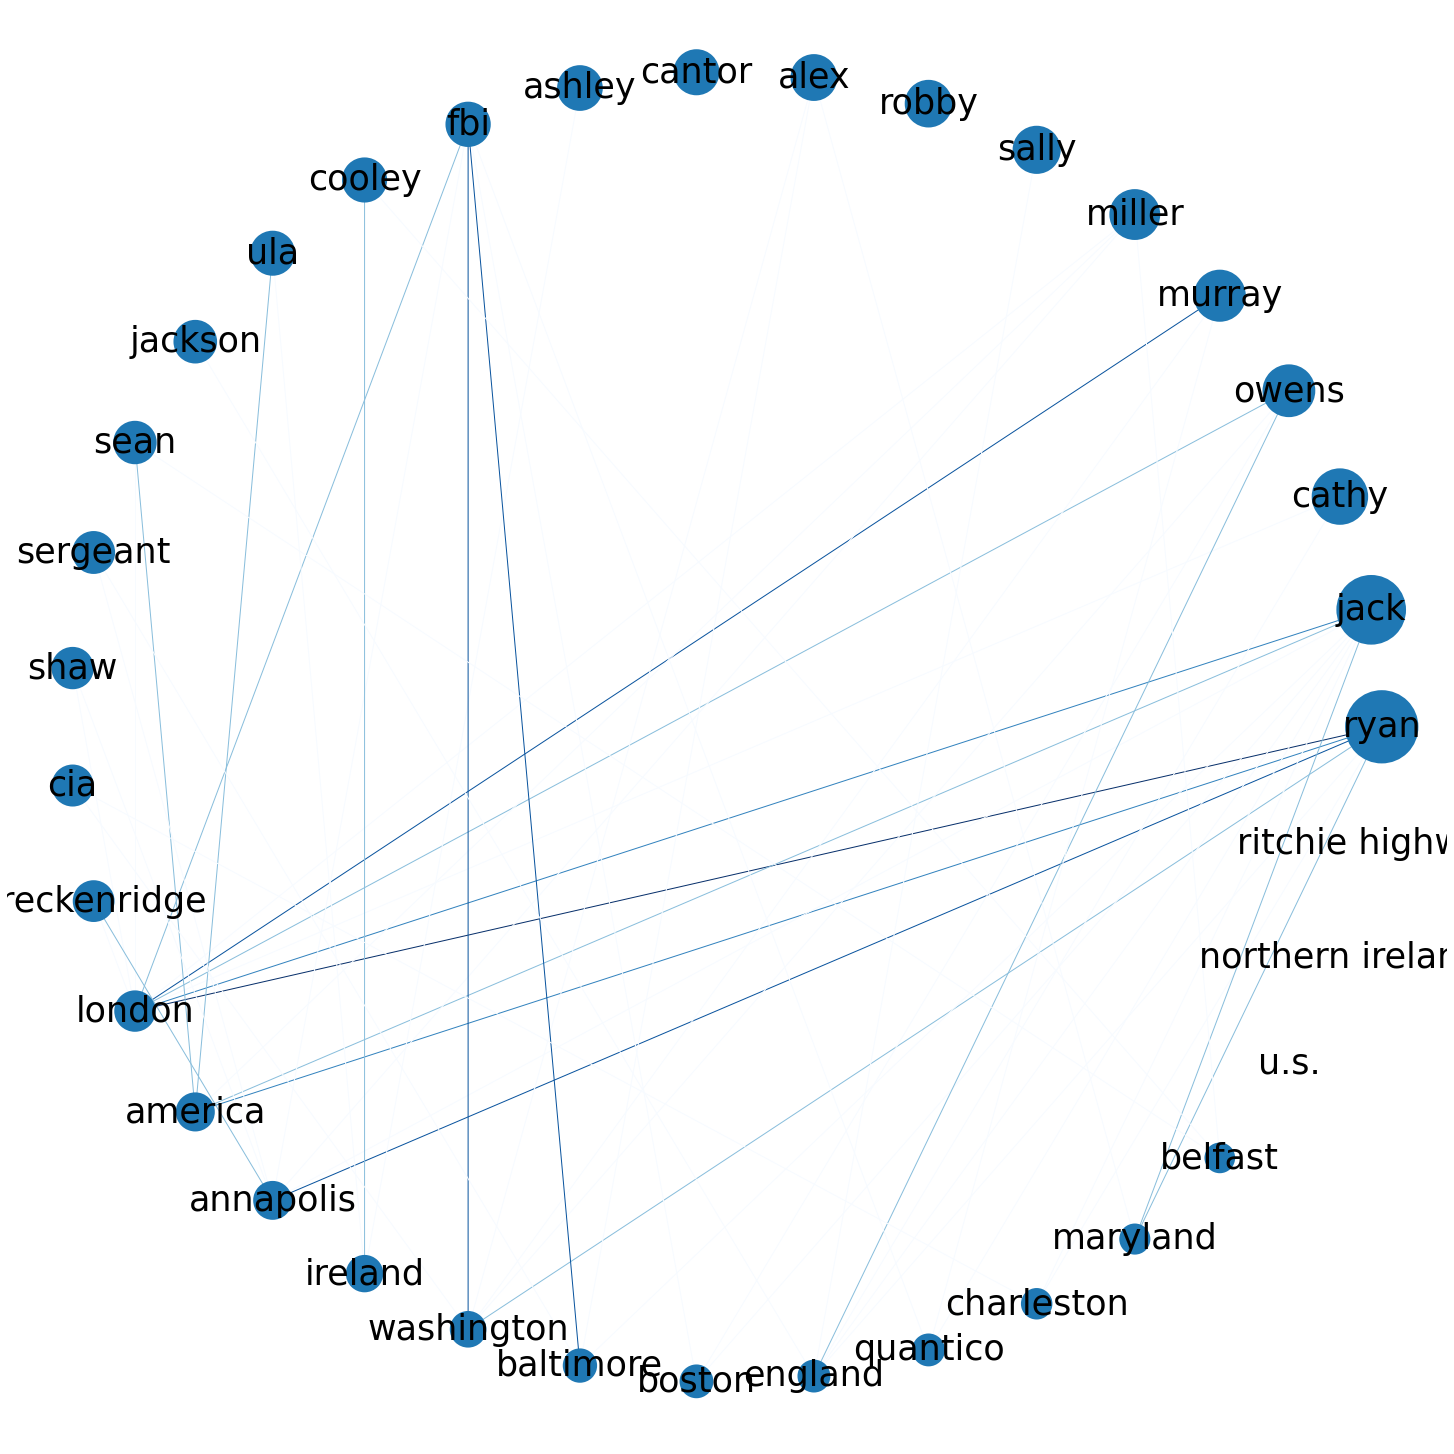

In [6]:
plot_graph_v2(name_list, name_frequency, place_list, place_frequency, cooccurrence_matrix_combined, novel_name + ' co-occurrence graph', 'co-occurrence')
# plot_graph_v2(name_list, name_frequency, place_list, place_frequency, sentiment_matrix_combined, novel_name + ' sentiment graph', 'sentiment')

<Figure size 1440x1440 with 0 Axes>

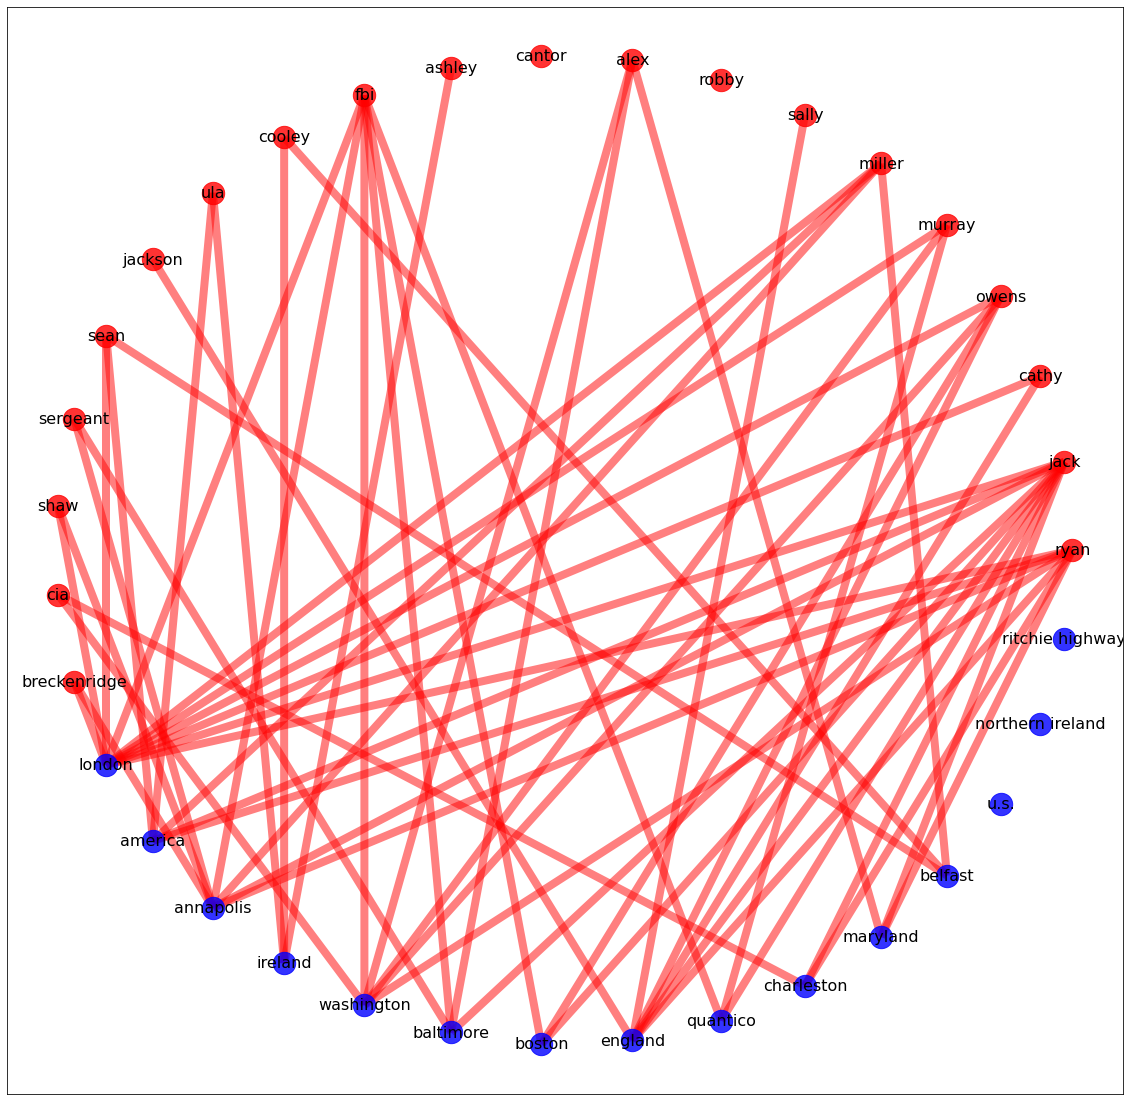

In [7]:
from character_network_iterative import plot_graph_v3
plot_graph_v3(name_list, name_frequency, place_list, place_frequency, cooccurrence_matrix_combined, novel_name + ' co-occurrence graph', 'co-occurrence')

In [18]:
combined_name_place_list

['harry',
 'ron',
 'hagrid',
 'hermione',
 'don',
 'snape',
 'dumbledore',
 'dudley',
 'malfoy',
 'yeh',
 'neville',
 'vernon',
 'quirrell',
 'potter',
 'mcgonagall',
 'gryffindor',
 'hogwarts',
 'heard',
 'quidditch',
 'petunia',
 'vernon',
 'hogwarts',
 'quidditch',
 'firenze',
 'london',
 'flint',
 'romania',
 'privet drive',
 'uncle vernon',
 'smelting stick',
 'the leaky cauldron',
 'the great hall']

In [ ]:
plot_graph_v2(name_list, name_frequency, place_list, place_frequency, cooccurrence_matrix_combined, novel_name + ' co-occurrence graph', 'co-occurrence')
# plot_graph_v2(name_list, name_frequency, place_list, place_frequency, sentiment_matrix_combined, novel_name + ' sentiment graph', 'sentiment')

In [ ]:
plot_graph(name_list, name_frequency, cooccurrence_matrix, novel_name + ' co-occurrence graph', 'co-occurrence')

{0: array([ 0.83338717, -0.50868809]), 1: array([1.        , 0.56656231]), 2: array([0.25154718, 0.14639122]), 3: array([ 0.00412826, -0.9736691 ]), 4: array([-0.25299107, -0.15141667]), 5: array([-0.99928509, -0.5629083 ]), 6: array([-0.83446591,  0.50920159]), 7: array([-0.00232054,  0.97452703])}


(-1.0992493462907604,
 1.0999642545852744,
 -1.0710789078792693,
 1.071936840405938)

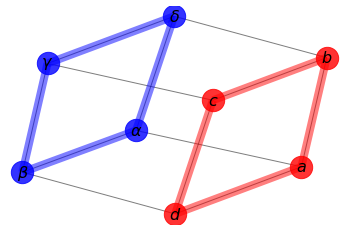

In [77]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.cubical_graph()
pos = nx.spring_layout(G)  # positions for all nodes
print(pos)
# nodes
options = {"node_size": 500, "alpha": 0.8}
nx.draw_networkx_nodes(G, pos, nodelist=[0, 1, 2, 3], node_color="r", **options)
nx.draw_networkx_nodes(G, pos, nodelist=[4, 5, 6, 7], node_color="b", **options)

# edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(0, 1), (1, 2), (2, 3), (3, 0)],
    width=8,
    alpha=0.5,
    edge_color="r",
)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(4, 5), (5, 6), (6, 7), (7, 4)],
    width=8,
    alpha=0.5,
    edge_color="b",
)


# some math labels
labels = {}
labels[0] = r"$a$"
labels[1] = r"$b$"
labels[2] = r"$c$"
labels[3] = r"$d$"
labels[4] = r"$\alpha$"
labels[5] = r"$\beta$"
labels[6] = r"$\gamma$"
labels[7] = r"$\delta$"
nx.draw_networkx_labels(G, pos, labels, font_size=16)

plt.axis("off")